In [1]:
import matplotlib.pyplot as plt
import numpy as np

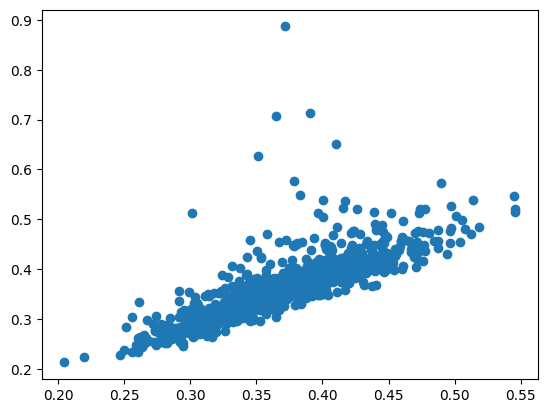

In [2]:
d = 100  # 入力ベクトルの次元
n = 1000  # 入力サンプル数
x = np.random.randn(n, d) / np.sqrt(d)  # サンプルの生成
y = np.random.randn(n, d) / np.sqrt(d)  # サンプルの生成
gt = np.exp(-np.sum((x - y) ** 2, axis=1) / 2)  # 真のガウスカーネル値

D = 100  # ランダム特徴量の次元
w = np.random.randn(D, d)
Q, _ = np.linalg.qr(w.T)  # 直交方向を取得
length = np.linalg.norm(np.random.randn(D, d), axis=1, keepdims=True)  # 長さを取得
w = Q.T * length

rx = (
    np.hstack([np.exp(x @ w.T), np.exp(-x @ w.T)]) * np.exp(-(x * x).sum(axis=1, keepdims=True)) * np.sqrt(1 / (2 * D))
)  # ランダム特徴量
ry = (
    np.hstack([np.exp(y @ w.T), np.exp(-y @ w.T)]) * np.exp(-(y * y).sum(axis=1, keepdims=True)) * np.sqrt(1 / (2 * D))
)  # ランダム特徴量
rf = (rx * ry).sum(axis=1)  # ランダム特徴量による近似
plt.scatter(gt, rf)